In [26]:
import pandas as pd
import numpy as np

import scipy.stats as stats  #for qqplot

import matplotlib.pyplot as plt
import seaborn as sns# for distplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score #for more better underetanding of model output 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.pipeline import Pipeline,make_pipeline

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
df = pd.read_csv(r'C:\Users\sande\Desktop\train.csv',usecols=['Age','Fare','Survived'])
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [2]:
df

NameError: name 'df' is not defined

In [10]:
df['Age'].fillna(df['Age'].mean(),inplace=True)


C:\Users\sande\AppData\Local\Temp\ipykernel_14276\1275544653.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [11]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [12]:
df.head

<bound method NDFrame.head of      Survived        Age     Fare
0           0  22.000000   7.2500
1           1  38.000000  71.2833
2           1  26.000000   7.9250
3           1  35.000000  53.1000
4           0  35.000000   8.0500
..        ...        ...      ...
886         0  27.000000  13.0000
887         1  19.000000  30.0000
888         0  29.699118  23.4500
889         1  26.000000  30.0000
890         0  32.000000   7.7500

[891 rows x 3 columns]>

In [19]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]

In [20]:
X

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [21]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\sande\AppData\Local\Temp\ipykernel_14276\474975069.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


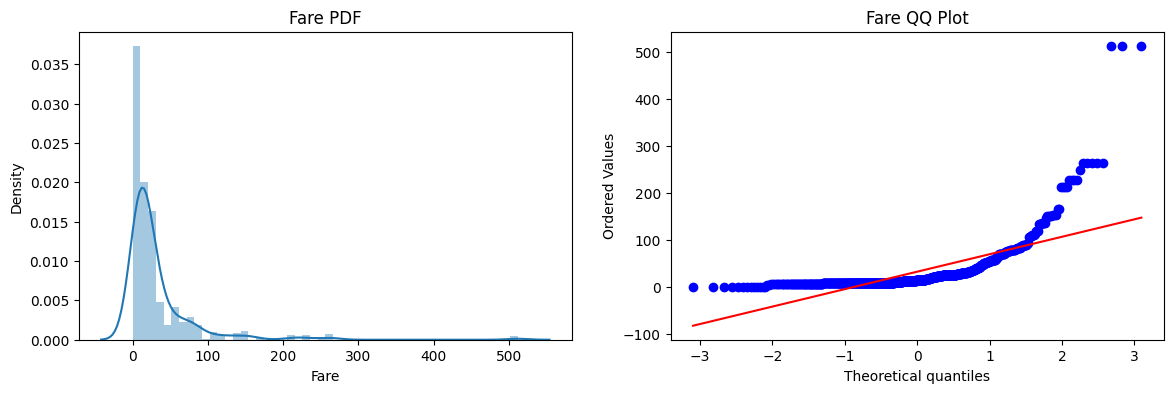

In [37]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [38]:
#right skewed so log trnsform
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6815642458100558


In [39]:
#apply log transform
trf = FunctionTransformer(func=np.log1p)
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6815642458100558


In [ ]:
#transformation only applicable to loginstic not to decision tree


In [40]:
#cross val score
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6566167290886392


C:\Users\sande\AppData\Local\Temp\ipykernel_14276\1796258835.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed['Fare'])


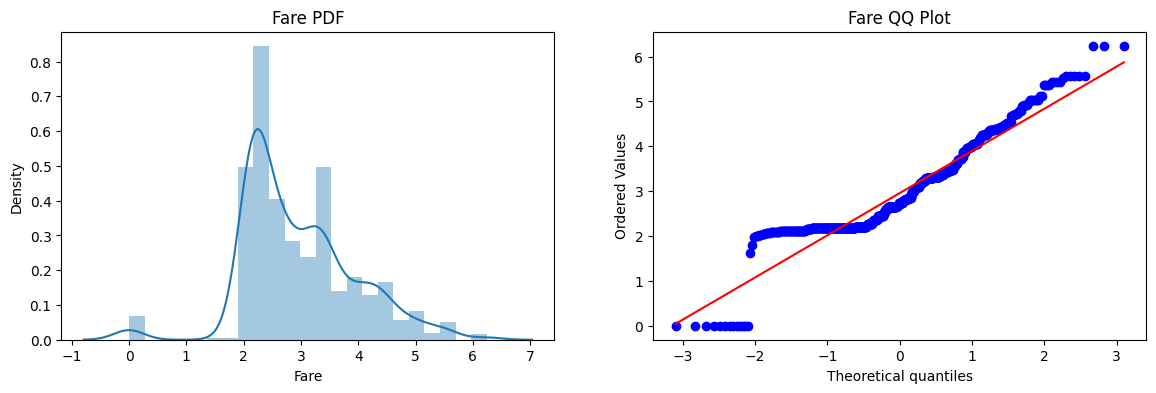

In [45]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train_transformed['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()